In [1]:
import numpy as np
import pandas as pd
# 导入数据集
X = [[0.697, 0.460], [0.774, 0.376], [0.634, 0.264], [0.608, 0.318], [0.556, 0.215], [0.403, 0.237],
          [0.481, 0.149], [0.437, 0.211],[0.666, 0.091], [0.243, 0.267], [0.245, 0.057], [0.343, 0.099], 
          [0.639, 0.161], [0.657, 0.198],[0.360, 0.370], [0.593, 0.042], [0.719, 0.103]
         ]
Y = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
X = pd.DataFrame(X)
X.columns = ['密度','含糖率']
Y = pd.Series(Y)
full = pd.concat([X,Y],1)
full.columns = ['密度','含糖率','好瓜']

/var/folders/rw/jnp3vk496x545p9qdlhvb70r0000gn/T/ipykernel_8783/474851707.py:12: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  full = pd.concat([X,Y],1)


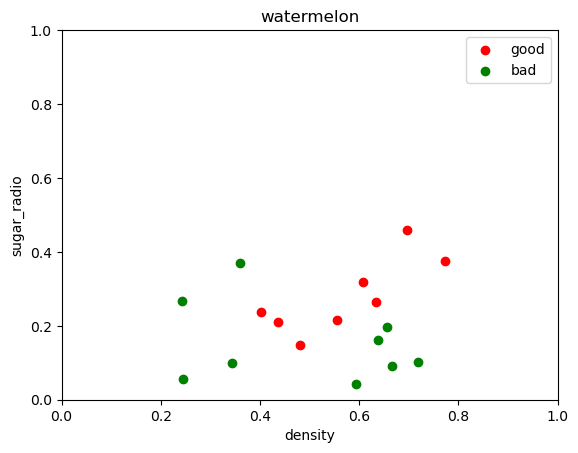

In [2]:
# 画图
import matplotlib.pyplot as plt
good_melon = full[full['好瓜'] == 1]
bad_melon = full[full['好瓜'] == 0]
f = plt.figure(1)
plt.title("watermelon")
plt.xlabel('density')
plt.ylabel('sugar_radio')
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(good_melon['密度'],good_melon['含糖率'],marker='o',color='r',label='good')
plt.scatter(bad_melon['密度'],bad_melon['含糖率'],marker='o',color='g',label='bad')
# plt.plot(X_pred, line_pred)
plt.legend(loc='upper right')

In [3]:
# 划分数据集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [4]:
# train
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [5]:
# 评估
from sklearn import metrics
y_predict = model.predict(x_test)
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [15]:
model.coef_


array([-3.18599609])

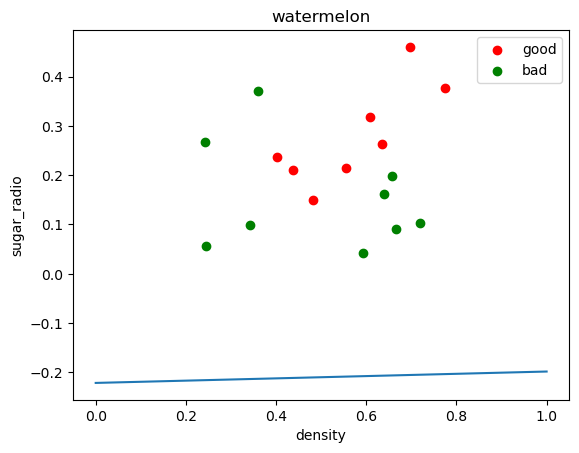

In [19]:
# 绘制几率回归曲线
theta1, theta2 = model.coef_[0][0], model.coef_[0][1]
X_pred = np.linspace(0,1,100)
line_pred =(theta1 * X_pred+model.intercept_)/theta2
plt.plot(X_pred, line_pred)
# 将数据点加入
plt.title("watermelon")
plt.xlabel('density')
plt.ylabel('sugar_radio')
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.scatter(good_melon['密度'],good_melon['含糖率'],marker='o',color='r',label='good')
plt.scatter(bad_melon['密度'],bad_melon['含糖率'],marker='o',color='g',label='bad')
# plt.plot(X_pred, line_pred)
plt.legend(loc='upper right')
plt.show()